# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import os
import zipfile


In [ ]:
import seaborn as sns

In [ ]:
from tensorflow.keras.utils import to_categorical


# Reading data

In [ ]:
local_path = os.path.join('amazon reviews priority.zip')

In [ ]:
zip_ref = zipfile.ZipFile(local_path)
zip_ref.extractall('data')
zip_ref.close()

In [ ]:
train_path = os.path.join('data' , 'train.csv')
df = pd.read_csv(train_path , header = None)

In [ ]:
df

,0,1,2
0,2,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,2,The best soundtrack ever to anything.,I'm reading a lot of reviews saying that this ...
2,2,Amazing!,This soundtrack is my favorite music of all ti...
3,2,Excellent Soundtrack,I truly like this soundtrack and I enjoy video...
4,2,"Remember, Pull Your Jaw Off The Floor After He...","If you've played the game, you know how divine..."
...,...,...,...
3599995,1,Don't do it!!,The high chair looks great when it first comes...
3599996,1,"Looks nice, low functionality",I have used this highchair for 2 kids now and ...
3599997,1,"compact, but hard to clean","We have a small house, and really wanted two o..."
3599998,1,what is it saying?,not sure what this book is supposed to be. It ...


In [ ]:
test_path = os.path.join('data' , 'test.csv')
df_test = pd.read_csv(test_path , header = None)


# EDA

In [ ]:
df = df.sample(100_000)

In [ ]:
df[0].value_counts()

2    50038
1    49962
Name: 0, dtype: int64

In [ ]:
df_test[0].value_counts()

1    200000
2    200000
Name: 0, dtype: int64

In [ ]:
df = df.sample(len(df))

In [ ]:
df_test = df_test.sample(len(df_test))

In [ ]:
df['title_text'] = df[1] + ' ' + df[2]

In [ ]:
df_test['title_text'] = df_test[1] + ' ' + df_test[2]

In [ ]:
df.head()

,0,1,2,title_text
2553817,2,"discharge, by discharge","Nobody does punk like Discharge, they're loud,...","discharge, by discharge Nobody does punk like ..."
3532175,2,Great to help you remember the first time you ...,"I'll admit, there are a couple of songs on the...",Great to help you remember the first time you ...
2506332,2,Leslie Sassone-Walk Strong,This walk video is very good for me. I am sixt...,Leslie Sassone-Walk Strong This walk video is ...
2552692,1,Don't waste your money,The two cd's that come with this are strictly ...,Don't waste your money The two cd's that come ...
1457101,1,Bad odor,I have 2 of these air cleaners and have ordere...,Bad odor I have 2 of these air cleaners and ha...


In [ ]:
df_test.head()

,0,1,2,title_text
82170,2,This was a MASTERPIECE,This is another of Hitchcock's great films. Li...,This was a MASTERPIECE This is another of Hitc...
21559,2,Certainly the place to start-- the very best s...,I read this in its original 1967 edition when ...,Certainly the place to start-- the very best s...
214899,2,Great cart,This is a slick little cart and well worth the...,Great cart This is a slick little cart and wel...
25988,2,You Will Not be Disappointed,Probably one of the greatest books of the twen...,You Will Not be Disappointed Probably one of t...
265944,2,Works fine,Very good case the ipod is very protected and ...,Works fine Very good case the ipod is very pro...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 100000 entries, 2553817 to 1758741

Data columns (total 4 columns):

 #   Column      Non-Null Count   Dtype 

---  ------      --------------   ----- 

 0   0           100000 non-null  int64 

 1   1           99998 non-null   object

 2   2           100000 non-null  object

 3   title_text  99998 non-null   object

dtypes: int64(1), object(3)

memory usage: 3.8+ MB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>

Int64Index: 400000 entries, 82170 to 265497

Data columns (total 4 columns):

 #   Column      Non-Null Count   Dtype 

---  ------      --------------   ----- 

 0   0           400000 non-null  int64 

 1   1           399990 non-null  object

 2   2           400000 non-null  object

 3   title_text  399990 non-null  object

dtypes: int64(1), object(3)

memory usage: 15.3+ MB


In [ ]:
df_test.dropna(inplace = True)

In [ ]:
df['label'] = df[0].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
df_test['label'] = df_test[0].apply(lambda x: 0 if x == 1 else 1)

In [ ]:
# converting features into numpy arrays

In [ ]:
x_train = np.array(df['title_text'] , dtype = 'str')

In [ ]:
x_train[:3]

array(["discharge, by discharge Nobody does punk like Discharge, they're loud, fast, and aggressive. Cal on vocals, sounds great, the rest of the band is awsome. This is the line-up I like the best.",
       "Great to help you remember the first time you fell in love.. I'll admit, there are a couple of songs on the album that are repetitious, but overall the album carries a vibe so powerful that you become lost in the music. One Way didn't get enough props while they were around, but this compilation certainly does them justice.",
       'Leslie Sassone-Walk Strong This walk video is very good for me. I am sixty-three and I can now do the two mile walk and I feel I am getting great cardio benefits from it. This is my third video of Leslie Sassones and I think she does a great job.'],
      dtype='<U1014')

In [ ]:
y_train = np.array(df['label'] , dtype = 'int32')

In [ ]:
x_test =  np.array(df_test['title_text'] , dtype = 'str')
y_test = np.array(df_test['label'] , dtype = 'int32')

In [ ]:
y_test

array([1, 1, 1, ..., 0, 1, 1])


# Tokeninzing

In [ ]:
average_len = np.mean([len(item) for item in x_train])

In [ ]:
average_len # average length of comments

430.76133

In [ ]:
max_len = int(average_len + 100)

In [ ]:
tokenizer = Tokenizer(num_words = 10_000 , oov_token='<OOV>')
tokenizer.fit_on_texts(x_train)

train_seq = tokenizer.texts_to_sequences(x_train)
test_seq = tokenizer.texts_to_sequences(x_test)

In [ ]:
train_pad = pad_sequences(train_seq , maxlen = max_len )
test_pad = pad_sequences(test_seq , maxlen = max_len )

In [ ]:
train_label = to_categorical(y_train)
test_label = to_categorical(y_test)

In [ ]:
y_train

array([1, 1, 1, ..., 0, 0, 0])


# Modeling

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Embedding(10_000 , 16),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16 , return_sequences=  True)) ,
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512 , activation = 'relu'),
    tf.keras.layers.Dense(1 , activation = 'sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"

_________________________________________________________________

Layer (type)                 Output Shape              Param #   


embedding (Embedding)        (None, None, 16)          160000    

_________________________________________________________________

bidirectional (Bidirectional (None, None, 32)          4224      

_________________________________________________________________

batch_normalization (BatchNo (None, None, 32)          128       

_________________________________________________________________

bidirectional_1 (Bidirection (None, 64)                16640     

_________________________________________________________________

dropout (Dropout)            (None, 64)                0         

_________________________________________________________________

dense (Dense)                (None, 512)               33280     

_________________________________________________________________

dense_1 (Dense)              (None, 1)  

In [ ]:
model.compile(loss = tf.keras.losses.binary_crossentropy , optimizer = tf.keras.optimizers.Adam() , metrics = ['accuracy'])

In [ ]:
history = model.fit(train_pad , y_train , validation_split = 0.1 , epochs = 10)

Epoch 1/10

2813/2813 [==============================] - 310s 108ms/step - loss: 0.3916 - accuracy: 0.8150 - val_loss: 0.2378 - val_accuracy: 0.9048

Epoch 2/10

2813/2813 [==============================] - 333s 118ms/step - loss: 0.1939 - accuracy: 0.9254 - val_loss: 0.2137 - val_accuracy: 0.9154

Epoch 3/10

2813/2813 [==============================] - 391s 139ms/step - loss: 0.1371 - accuracy: 0.9499 - val_loss: 0.2279 - val_accuracy: 0.9137

Epoch 4/10

2813/2813 [==============================] - 484s 172ms/step - loss: 0.0995 - accuracy: 0.9647 - val_loss: 0.2446 - val_accuracy: 0.9094

Epoch 5/10

2813/2813 [==============================] - 455s 162ms/step - loss: 0.0755 - accuracy: 0.9756 - val_loss: 0.3139 - val_accuracy: 0.9069

Epoch 6/10

2813/2813 [==============================] - 377s 134ms/step - loss: 0.0560 - accuracy: 0.9817 - val_loss: 0.3272 - val_accuracy: 0.9042

Epoch 7/10

2813/2813 [==============================] - 478s 170ms/step - loss: 0.0415 - accuracy: 


# Overfitting check

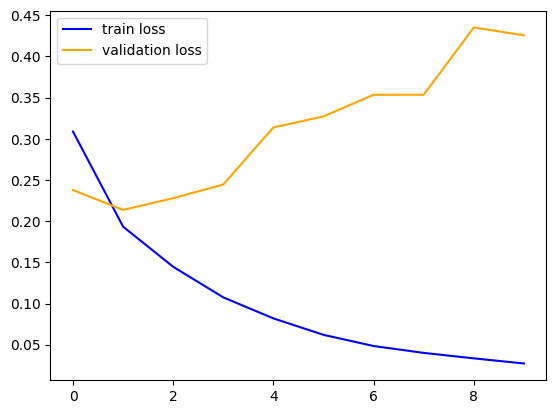

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(loss , 'b' , label = 'train loss')
plt.plot(val_loss , 'orange' , label = 'validation loss')

plt.legend()
plt.show()

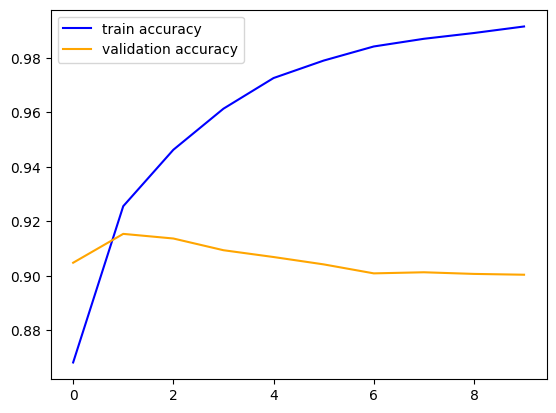

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc , 'b' , label = 'train accuracy')
plt.plot(val_acc , 'orange' , label = 'validation accuracy')

plt.legend()
plt.show()


# Evaluation

In [ ]:
model.evaluate(test_pad , y_test)

12500/12500 [==============================] - 725s 58ms/step - loss: 0.3911 - accuracy: 0.9058


[0.39107951521873474, 0.9057576656341553]